In [1]:
import pandas as pd
import numpy as np

In [2]:
df_loan = pd.read_csv('loan_data.csv')

In [3]:
df_loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df_loan.shape

(9578, 14)

In [5]:
df_loan.rename(columns = {'credit.policy':'credit_policy'}, inplace=True)

In [6]:
df_loan.credit_policy.unique()

array([1, 0])

In [7]:
df_loan.isna().sum()

credit_policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
df_loan['purpose'].replace(['debt_consolidation', 'credit_card', 'all_other', 'home_improvement', 'small_business', 'educational', 'major_purchase'],[0, 1, 2, 3, 4, 5, 6], inplace=True)

In [9]:
df_loan

,credit_policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,2,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,2,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,3,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [10]:
X = df_loan.drop(['credit_policy'],axis=1)
y = df_loan['credit_policy']

In [11]:
np.random.seed(12345)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train,y_test = train_test_split(X,
                                                   y,
                                                   stratify = y,
                                                   test_size=0.2,
                                                   random_state=12345)

In [14]:
X_train.shape

(7662, 13)

In [15]:
X_test.shape

(1916, 13)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
import tensorflow as tf

In [19]:
print(tf.__version__)

2.8.0


In [20]:
from tensorflow.keras.models import Sequential

In [21]:
from tensorflow.keras.layers import Dense, Input

In [22]:
model = Sequential()

In [23]:
X_train_scaled.shape[1]

13

In [24]:
model.add(Input(shape = (X_train_scaled.shape[1],)))

In [25]:
model.add(Dense(units=128,
                activation='relu'
         ))

In [26]:
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

In [27]:
model.add(Dense(units=1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

In [30]:
result = model.fit(X_train_scaled, 
                   y_train,
                   validation_data = (X_test_scaled, y_test),
                   epochs=100)

Epoch 1/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2876 - accuracy: 0.8905 - val_loss: 0.2364 - val_accuracy: 0.8972
Epoch 2/100
240/240 [==============================] - 1s 2ms/step - loss: 0.2105 - accuracy: 0.9152 - val_loss: 0.2066 - val_accuracy: 0.9181
Epoch 3/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1822 - accuracy: 0.9281 - val_loss: 0.1859 - val_accuracy: 0.9254
Epoch 4/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1657 - accuracy: 0.9353 - val_loss: 0.1744 - val_accuracy: 0.9295
Epoch 5/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1415 - accuracy: 0.9457 - val_loss: 0.1527 - val_accuracy: 0.9374
Epoch 6/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1284 - accuracy: 0.9528 - val_loss: 0.1430 - val_accuracy: 0.9462
Epoch 7/100
240/240 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.9582 - val_loss: 0.1735 - val_accuracy: 0.9290

In [31]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [32]:
y_train_pred[0] >=0.5

array([ True])

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
confusion_matrix(y_pred=y_train_pred >= 0.5, 
                 y_true = y_train)

array([[1481,   13],
       [   6, 6162]])

In [35]:
accuracy_score(y_pred=y_train_pred >= 0.5, 
               y_true = y_train)

0.9975202297050378

In [36]:
confusion_matrix(y_pred=y_test_pred >= 0.5, 
                 y_true = y_test)

array([[ 321,   53],
       [  24, 1518]])

In [37]:
accuracy_score(y_pred=y_test_pred >= 0.5, 
               y_true = y_test)

0.9598121085594989

In [38]:
history = pd.DataFrame(result.history)

In [39]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.287570,0.890499,0.236369,0.897182
1,0.210523,0.915166,0.206600,0.918058
2,0.182182,0.928087,0.185869,0.925365
3,0.165670,0.935265,0.174412,0.929541
4,0.141542,0.945706,0.152695,0.937370


In [40]:
import matplotlib.pyplot as plt

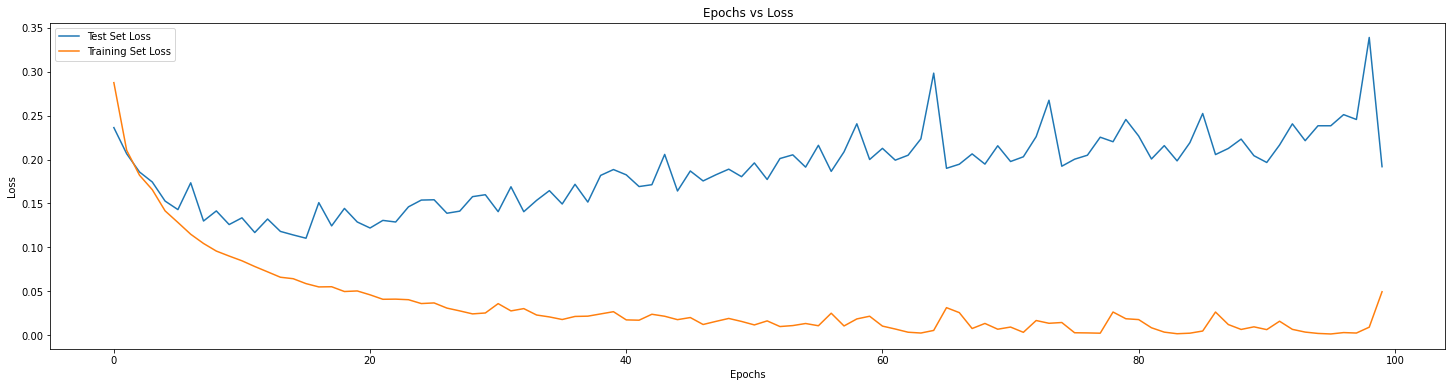

In [41]:
plt.figure(figsize = (25,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(history.val_accuracy, label='Test Set Accuracy')
plt.plot(history.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()